In [2]:
import pandas as pd
import numpy as np

df_num = pd.read_pickle("preprocessed")
df_num.head()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
0,0.109589,0.144430,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,1,0
1,0.287671,0.051677,0.000000,0.0,0.500000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0.150685,0.219011,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,0.369863,0.099418,0.076881,0.0,0.397959,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,0.232877,0.125398,0.000000,0.0,0.295918,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0


In [7]:
df_sampled = df_num.sample(n=2000)
df_sampled.head()

,age,fnlwgt,capitalGain,capitalLoss,hoursPerWeek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,salary_<=50K,salary_>50K
35629,0.109589,0.057731,0.0,0.0,0.500000,0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
38126,0.328767,0.023299,0.0,0.0,0.500000,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
36790,0.191781,0.186532,0.0,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
21651,0.876712,0.073910,0.0,0.0,0.142857,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
38796,0.561644,0.056923,0.0,0.0,0.377551,0,0,1,0,0,...,1,0,0,0,0,1,1,0,1,0


In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
    
pca = PCA(n_components=2, random_state=0)
tsne = TSNE(n_components=2, random_state=0, perplexity=50) # Ici 30 semble mieux que 50.

df_pca_2d = pca.fit_transform(df_sampled)
df_tsne_2d = tsne.fit_transform(df_sampled)

In [9]:
df_tsne_2d

array([[ 12.428097, -49.707348],
       [-10.61808 ,  57.389023],
       [ 16.614239, -17.451962],
       ...,
       [-17.519442,  49.41743 ],
       [ 22.418081, -38.996426],
       [ -6.145581, -28.661243]], dtype=float32)

In [48]:
def drawData(X_scores, color_column, titre="2D Viz", legend_loc = "upper right"):
    x_max = X_scores[:, 0].max()
    x_min = X_scores[:, 0].min()
    y_max = X_scores[:, 1].max()
    y_min = X_scores[:, 1].min()
    
    len_x = x_max - x_min
    len_y = y_max - y_min

#     xx, yy = np.meshgrid(np.linspace(x_min - len_x / 10, x_max + len_x / 10, 50), 
#                      np.linspace(y_min - len_y, y_max + len_y, 50))
#     Z = ilf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

    plt.title(titre)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
    
    color_class = color_column.unique()
    color_num = color_class.size
    print(color_num)
    cm = get_cmap('gist_rainbow')
    cgen = (cm(1.*i/color_num) for i in range(color_num))
    
    for i, color in enumerate(cgen):
        plt.scatter(X_scores[:, 0][color_column == color_class[i]], X_scores[:, 1][color_column == color_class[i]], c=color,
                 s=20, edgecolor='k')
        print(i)
    plt.axis('tight')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#    plt.legend([TN, TP, FN, FP], ["True negative", "True positive", "False negative", "False positive"], loc=legend_loc)

In [12]:
from pylab import get_cmap
NUM_COLORS = 22

In [41]:
cm = get_cmap('gist_rainbow')

cgen = (cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS))

print(cgen)

import matplotlib.pyplot as plt
%matplotlib inline

<generator object <genexpr> at 0x7fa8dfaa25c8>


In [30]:
df_num['workclass_Local-gov'].unique().size

2

2
0
1


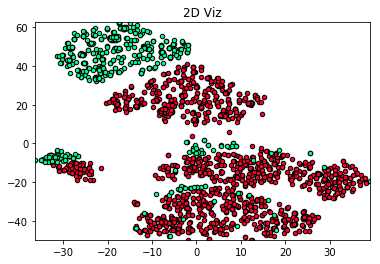

In [49]:
drawData(df_tsne_2d, df_sampled["salary_<=50K"])

2
0
1


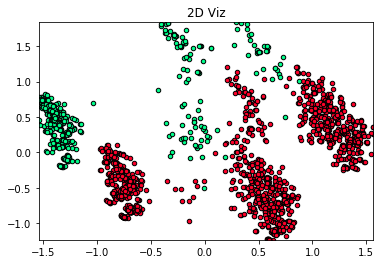

In [50]:
drawData(df_pca_2d, df_sampled["salary_<=50K"])